# Two Pinter O(1)

Start the pointers at the edges of the input. Move them towards each other until they meet.

    function fn(arr):
        left = 0
        right = arr.length - 1

        while left < right:
            Do some logic here depending on the problem
            Do some more logic here to decide on one of the following:
                1. left++
                2. right--
                3. Both left++ and right--

Example 1: Given a string s, return true if it is a palindrome, false otherwise.

A string is a palindrome if it reads the same forward as backward. That means, after reversing it, it is still the same string. For example: "abcdcba", or "racecar".

In [2]:
def check_if_palindrome(s):
    left = 0
    right = len(s) - 1

    while left < right:
        if s[left] != s[right]:
            return False
        left += 1
        right -= 1
    
    return True

Example 2: Given a sorted array of unique integers and a target integer, return true if there exists a pair of numbers that sum to target, false otherwise. This problem is similar to Two Sum. (In Two Sum, the input is not sorted).

For example, given nums = [1, 2, 4, 6, 8, 9, 14, 15] and target = 13, return true because 4 + 9 = 13.

In [3]:
def check_for_target(nums, target):
    left = 0
    right = len(nums) - 1

    while left < right:
        # curr is the current sum
        curr = nums[left] + nums[right]
        if curr == target:
            return True
        if curr > target:
            right -= 1
        else:
            left += 1
    
    return False

# Another way to use two pointers

Move along both inputs simultaneously until all elements have been checked.

    function fn(arr1, arr2):
        i = j = 0
        while i < arr1.length AND j < arr2.length:
            Do some logic here depending on the problem
            Do some more logic here to decide on one of the following:
                1. i++
                2. j++
                3. Both i++ and j++

        // Step 4: make sure both iterables are exhausted
        // Note that only one of these loops would run
        while i < arr1.length:
            Do some logic here depending on the problem
            i++

        while j < arr2.length:
            Do some logic here depending on the problem
            j++

Example 3: Given two sorted integer arrays arr1 and arr2, return a new array that combines both of them and is also sorted.

In [4]:
def combine(arr1, arr2):
    # ans is the answer
    ans = []
    i = j = 0
    while i < len(arr1) and j < len(arr2):
        if arr1[i] < arr2[j]:
            ans.append(arr1[i])
            i += 1
        else:
            ans.append(arr2[j])
            j += 1
    
    while i < len(arr1):
        ans.append(arr1[i])
        i += 1
    
    while j < len(arr2):
        ans.append(arr2[j])
        j += 1
    
    return ans

Example 4: 392. Is Subsequence.

Given two strings s and t, return true if s is a subsequence of t, or false otherwise.

A subsequence of a string is a sequence of characters that can be obtained by deleting some (or none) of the characters from the original string, while maintaining the relative order of the remaining characters. For example, "ace" is a subsequence of "abcde" while "aec" is not.

In [5]:
class Solution:
    def isSubsequence(self, s: str, t: str) -> bool:
        i = j = 0
        while i < len(s) and j < len(t):
            if s[i] == t[j]:
                i += 1
            j += 1

        return i == len(s)

# Sliding window O(n)

Subarrays:

Given an array, a subarray is a contiguous section of the array. All the elements must be adjacent to each other in the original array and in their original order. For example, with the array [1, 2, 3, 4], the subarrays (grouped by length) are:

[1], [2], [3], [4]
[1, 2], [2, 3], [3, 4]
[1, 2, 3], [2, 3, 4]
[1, 2, 3, 4]

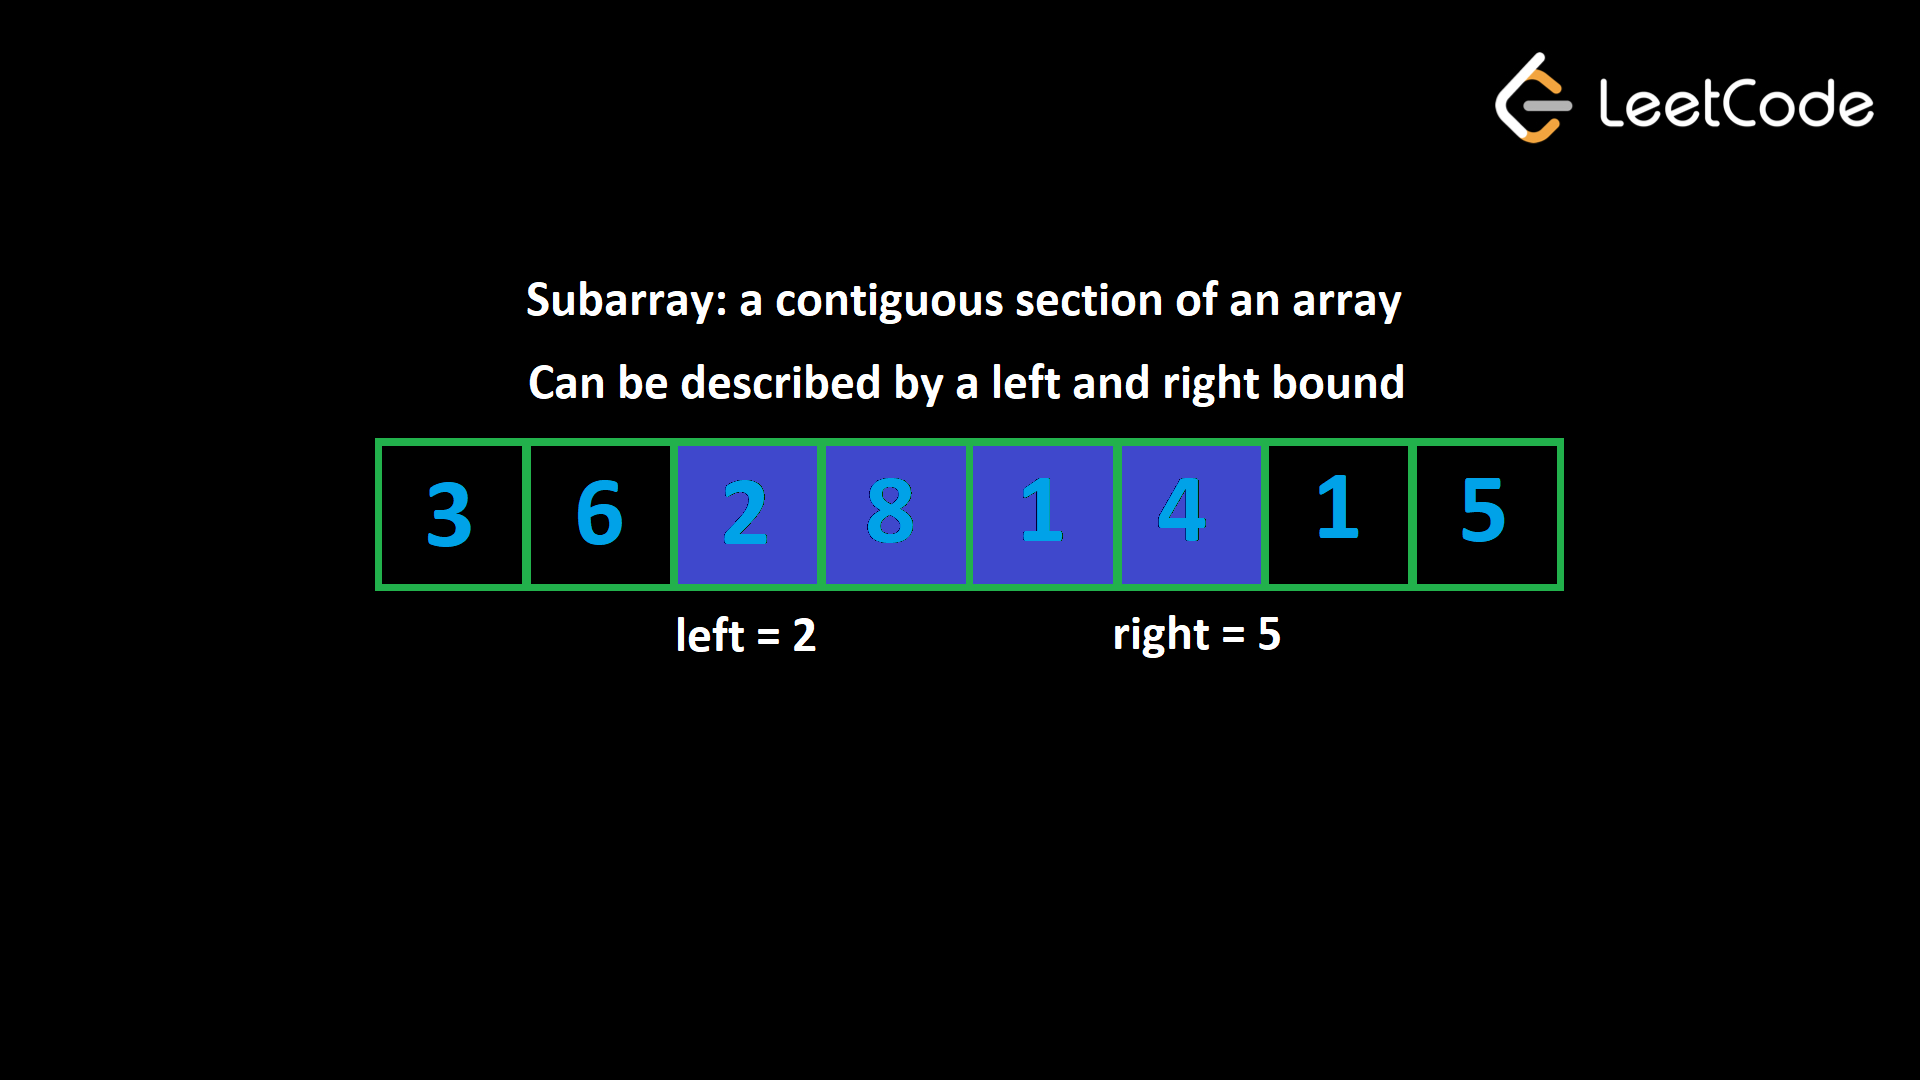

Whenever a problem description talks about subarrays, you should figure out if sliding window is a good option by analyzing the problem description. If you can find the things mentioned below, then it's a good bet.

1. A constraint metric. This is some attribute of a subarray. It could be the sum, the number of unique elements, the frequency of a specific element, or any other attribute.
2. A numeric restriction on the constraint metric. This is what the constraint metric should be for a subarray to be considered valid.
3. The most common task you will see is finding the best valid subarray. The problem will define what makes a subarray better than another. For example, a problem might ask you to find the longest valid subarray.

4. Another common task is finding the number of valid subarrays. 

Here is a preview of some of the example problems that we will look at in this article, to help you better understand what sliding window problems look like:

- Find the longest subarray with a sum less than or equal to k
- Find the longest substring that has at most one "0"
- Find the number of subarrays that have a product less than k

    function fn(arr):
        left = 0
        for (int right = 0; right < arr.length; right++):
            Do some logic to "add" element at arr[right] to window

            while WINDOW_IS_INVALID:
                Do some logic to "remove" element at arr[left] from window
                left++

            Do some logic to update the answer

Example 1 : we are given a positive integer array nums and an integer k. We need to find the length of the longest subarray that has a sum less than or equal to k. For this example, let nums = [3, 2, 1, 3, 1, 1] and k = 5

    function fn(nums, k):
        left = 0
        curr = 0
        answer = 0
        for (int right = 0; right < nums.length; right++):
            curr += nums[right]
            while (curr > k):
                curr -= nums[left]
                left++

            answer = max(answer, right - left + 1)

        return answer

In [8]:
def longestSubArray(nums, k):
    left = curr = ans = 0
    for right in range(len(nums)):
        curr += nums[right]
        while curr > k:
            curr -= nums[left]
            left += 1
        ans = max(ans, right - left + 1)
    return ans

In [9]:
nums = [3, 1, 2, 7, 4, 2, 1, 1, 5]
longestSubArray(nums, 8)

4

Example 2: You are given a binary string s (a string containing only "0" and "1"). You may choose up to one "0" and flip it to a "1". What is the length of the longest substring achievable that contains only "1"?

For example, given s = "1101100111", the answer is 5. If you perform the flip at index 2, the string becomes 1111100111.

Because the string can only contain "1" and "0", another way to look at this problem is "what is the longest substring that contains at most one "0"?". This makes it easy for us to solve with a sliding window where our condition is window.count("0") <= 1. We can use an integer curr that keeps track of how many "0" we currently have in our window.

In [42]:
def longestBinarySubOnlyOne(s, k):
    left = ans = 0
    curr = ""
    num_zeros = 0
    for right in range(len(s)):
        if s[right] == '0':
            num_zeros += 1
        curr += s[right]
                                    
        while num_zeros > k:
            if curr[left] == '0':
                num_zeros -= 1
            curr = curr[left+1:]
            left += 1
        ans = max(len(curr), ans)

    return ans

In [44]:
def longestBinarySubOnlyOne2(s, k):
    left = num_zeros = 0
    ans = 0
    for right in range(len(s)):
        if s[right] == '0':
            num_zeros += 1
        while num_zeros > k:
            if s[left] == '0':
                num_zeros -= 1
            left += 1
        ans = max(ans, right - left + 1)
    return ans

In [45]:
s = "1101100111"
longestBinarySubOnlyOne2(s, 1)

5

Example 3: 713. Subarray Product Less Than K.

Given an array of positive integers nums and an integer k, return the number of subarrays where the product of all the elements in the subarray is strictly less than k.

For example, given the input nums = [10, 5, 2, 6], k = 100, the answer is 8. The subarrays with products less than k are:

[10], [5], [2], [6], [10, 5], [5, 2], [2, 6], [5, 2, 6]

In [86]:
def subarrayProductLessThanK(nums, k):
    if k <= 1:
        return 0
    left=ans= 0
    curr = 1
    for right in range(len(nums)):
        curr *= nums[right]
        while curr >= k:
            curr //= nums[left]
            left += 1
        ans += right - left + 1
    return ans

In [87]:
nums = [10, 5, 2, 6]
subarrayProductLessThanK(nums, 100)

8

560(non-negative). Subarray Sum Equals K: Given an array of integers nums and an integer k, return the total number of subarrays whose sum equals to k.



In [124]:
def subarraySum(nums, k):
    left = curr = ans = 0
    for right in range(len(nums)):
        curr += nums[right]
        while left <= right and curr >= k:
            if curr == k:
                ans += 1
            curr -= nums[left]
            left += 1
    return ans

In [125]:
nums = [1,2,3]
subarraySum(nums, 3)

2

### Fixed window size

    function fn(arr, k):
        curr = some data to track the window

        // build the first window
        for (int i = 0; i < k; i++)
            Do something with curr or other variables to build first window

        ans = answer variable, probably equal to curr here depending on the problem
        for (int i = k; i < arr.length; i++)
            Add arr[i] to window
            Remove arr[i - k] from window
            Update ans

        return ans

Example 4: Given an integer array nums and an integer k, find the sum of the subarray with the largest sum whose length is k.

In [96]:
def find_best_subarray(nums , k):
    curr = 0
    for i in range(k):
        curr += nums[i]
    ans = curr

    for i in range(k, len(nums)):
        curr += nums[i] - nums[i-k]
        ans = max(ans, curr)
    return ans

In [97]:
nums = [1,2,3]
find_best_subarray(nums , 3)

6

643. Maximum Average Subarray I:

You are given an integer array nums consisting of n elements, and an integer k.
Find a contiguous subarray whose length is equal to k that has the maximum average value and return this value. Any answer with a calculation error less than 10-5 will be accepted.

In [126]:
def maximumAverageSubarray(nums, k):
    left = curr = ans = window_sum = 0
    for right in range(k):
        window_sum += nums[right]
        curr = window_sum/k
    ans = curr
    for i in range(k, len(nums)):
        window_sum += nums[i] - nums[i-k]
        curr = window_sum/k
        left += 1
        ans = max(ans, curr)
    return ans



In [127]:
nums = [1,12,-5,-6,50,3]
maximumAverageSubarray(nums, 4)

12.75

1004. Max Consecutive Ones III: 

Given a binary array nums and an integer k, return the maximum number of consecutive 1's in the array if you can flip at most k 0's.


Example 1: Given an integer array nums, an array queries where queries[i] = [x, y] and an integer limit, return a boolean array that represents the answer to each query. A query is true if the sum of the subarray from x to y is less than limit, or false otherwise.

For example, given nums = [1, 6, 3, 2, 7, 2], queries = [[0, 3], [2, 5], [2, 4]], and limit = 13, the answer is [true, false, true]. For each query, the subarray sums are [12, 14, 12].

In [8]:
def answer_queries(nums, queries, limit):
    prefix = [nums[0]]
    ans = [ ]
    for i in range(1, len(nums)):
        prefix.append(nums[i] + prefix[len(prefix) - 1])
    for (i,j) in queries:
        if prefix[j] - prefix[i] + nums[i] < limit:
            ans.append(True)
        else:
            ans.append(False)
    return ans

In [10]:
nums = [1,6,3,2,7,2]
queries = [[0,3], [2,5], [2,4]]
answer_queries(nums, queries, 13)

[True, False, True]

Example 2: 2270. Number of Ways to Split Array

Given an integer array nums, find the number of ways to split the array into two parts so that the first section has a sum greater than or equal to the sum of the second section. The second section should have at least one number.

In [21]:
def numberOfWaysToSlitArray(nums):
    prefix = [nums[0]]
    ans = 0
    for i in range(1, len(nums)):
        prefix.append(nums[i] + prefix[len(prefix)-1])
    for i in range(len(prefix)-1):
        if prefix[i] > prefix[len(prefix)-1] - prefix[i]:
            ans += 1
    return ans

In [22]:
nums = [10,4,-8,7]
numberOfWaysToSlitArray(nums)

2